In this notebook we gonna study **Drug consumption** dataset, supplied by UCI Repository.

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

The purpose of this project is making a high understanding of this dataset and build models which are able to make predictions through different approaches. Besides we gonna get lots of problems that we'll solve, so this notebook is like a kind of logbook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import os

dataset_path_root = "./dataset"
dataset_name = "drug_consumption.data"
desired_dataset = "drug_consumption.csv"

path_to_dataset = os.path.join(dataset_path_root, dataset_name)
path_to_desired_dataset = os.path.join(dataset_path_root, desired_dataset)

Since the original dataset doesn't has the features name, we've checked the features names on the website and we have:

In [2]:
features_name = ["ID", "Age", "Gender", "Education", "Country",
                "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore",
                 "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", 
                 "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke",
                 "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", 
                 "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA",
                ]

Now, we gonna load the original dataset called `drug_compsumption.data` and we wanna switch the format as `.csv ` instead.

In [3]:
with open(path_to_dataset, 'r') as input_f:
    stripped = (i.strip() for i in input_f)
    lines = (i.split(",") for i in stripped if i)
    with open(path_to_desired_dataset, 'w') as output:
        writer = csv.writer(output)
        writer.writerow(features_name)
        writer.writerows(lines)

Now, it's time to load the dataset.

In [4]:
dataset = pd.read_csv(path_to_desired_dataset)

dataset

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


There're 1885 entries, each one corresponds to people, and 32 features per person.

Regarding if we have null values in some entry, we gonna check:

In [5]:
dataset.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

It seems there aren't null values.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

As we saw, from Alcohol to VSA the feature type is an object, so we'll deal with them in a few minutes, either using integers or through binary arrays.

We might check the firsts and the last 5 entries:

In [7]:
pd.concat([dataset.head(5), dataset.tail(5)])

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [8]:
dataset.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


Now, we must discard ID option according to the database description:\
   `ID is number of record in original database. Cannot be related to participant. It can be used for reference only.`

In [9]:
dataset = dataset.drop(["ID"], axis=1)

As for the classification task, we have several alternatives:
- The first, we could use the kind of the drug as a class, making independent predictions without take into account the other drugs.
- The second, we might consider the other kinds of drugs when we are making a prediction for certain drug.

The first step will be store each drug's column into an array. In this way, we'll have a multidimensional matrix which stores each drug with their respective values.

In [10]:
drugs_name = ["Alcohol", "Amphet", "Amyl", "Benzos", 
              "Caff", "Cannabis", "Choc", "Coke",
              "Crack", "Ecstasy", "Heroin", "Ketamine", 
              "Legalh", "LSD", "Meth", "Mushrooms", 
              "Nicotine", "Semer", "VSA"]
drugs = dict()

for drug in dataset[drugs_name]:
    drugs[drug] = dataset[drug]

We might check the total of differents values per each feature:

In [11]:
for i in dataset.iloc[:, :12]:
    print(i, len(np.unique(dataset[i])))

Age 6
Gender 2
Education 9
Country 7
Ethnicity 7
Nscore 49
Escore 42
Oscore 35
Ascore 41
Cscore 41
Impulsive 10
SS 11


We have only showed 13 features because the following are the drugs, and their different values come from **CL0** to **CL6**.

Now, we should deal with the outliers if there were. The first thing we gonna do is plotting each pair of features from the **Nscore** to **Cscore** since the remaining features have a very low range of values.

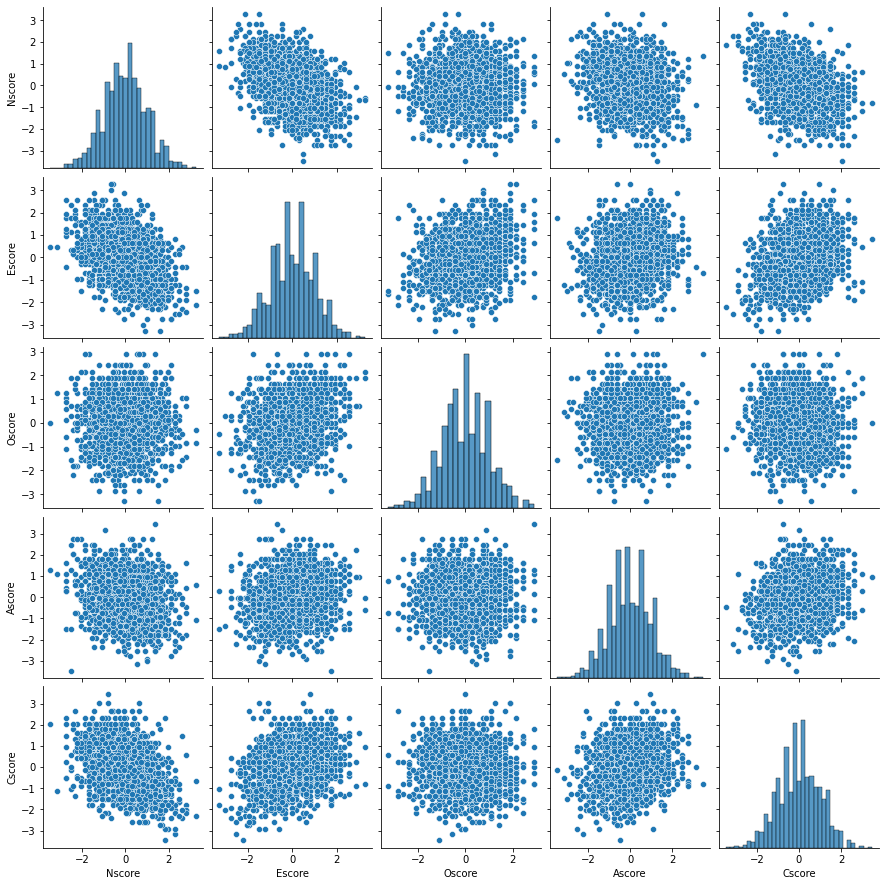

In [12]:
sns.pairplot(dataset[["Nscore", "Escore", "Oscore", "Ascore", "Cscore"]])
plt.show()

**Hint**: At first glance we have realized that there aren't any strong correlation. Instead, the few correlations we have, are so weak.

**We gonna make a dataset copy for the experiments we'll do, as we don't want to modify the original dataset.** For that purpose, we gonna use the **copy** library since we wanna deep copies.

In [13]:
import copy
dataset_copy = copy.deepcopy(dataset)

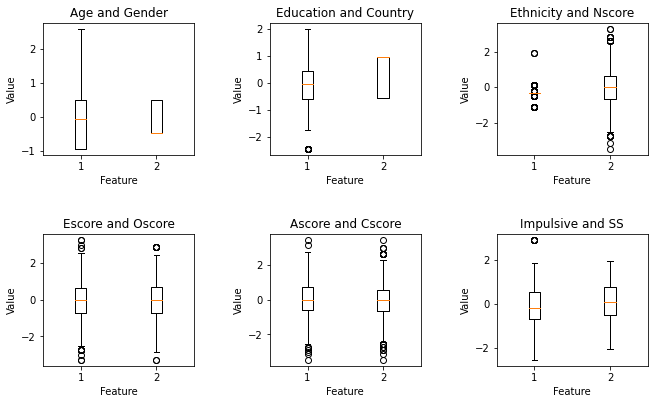

In [14]:
fig = plt.figure(figsize =(6, 4)) 
fig.subplots_adjust(left=0.1, right=1.5, bottom=0.01, top=1.2, hspace=0.6, wspace=0.5)

for i, index in enumerate(range(1, 13, 2)):
    ax = fig.add_subplot(2, 3, i+1)
    plt.boxplot( [dataset_copy[features_name[index] ],
               dataset_copy[features_name[index+1] ] ])
    
    plt.xlabel("Feature")
    plt.ylabel("Value")
    title = features_name[index] + " and " + features_name[index+1]
    plt.title(title)
    
plt.show()

Some of these features have outliers. For example regarding the Education, a few values are lower than -2, so looking the UCI website you can notice that people with lower education than -2 are those people who left school before 16 years. The total of those are 28, representing 1.49% of the people in this dataset. Could be a shame if we remove these values because generally, most people who take drugs are people who left school when they were young because they weren't aware about the side effects.

On the other hand, we have a lot of outliers on **Nscore**, **Escore**, **Oscore** and so on.

However, **Ethnicity** is the predictor which has the most outliers.

The method we gonna use for detecting outliers is the Interquartile Range (**IQR**).

We get the third and the first quartil and we gonna substract them in order to get the H-spread (or middle). Additionaly, once we have the H-spread, we can stablish bounds and we should select a **k** constant which usually has 1.5 as a value. Besides, every value which is lower than Q1 - 1.5IQR or higher than Q3 + 1.5IQR it gonna be considered as outlier.


 <figure>
  <img
  src="./images_description/iqr.png"
  alt="The beautiful MDN logo.">
    <figcaption>Image extracted from <a href ="https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51"> This post. </a> </figcaption>
</figure>


The way we could do that is:

/home/pablo/ml/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  
/home/pablo/ml/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


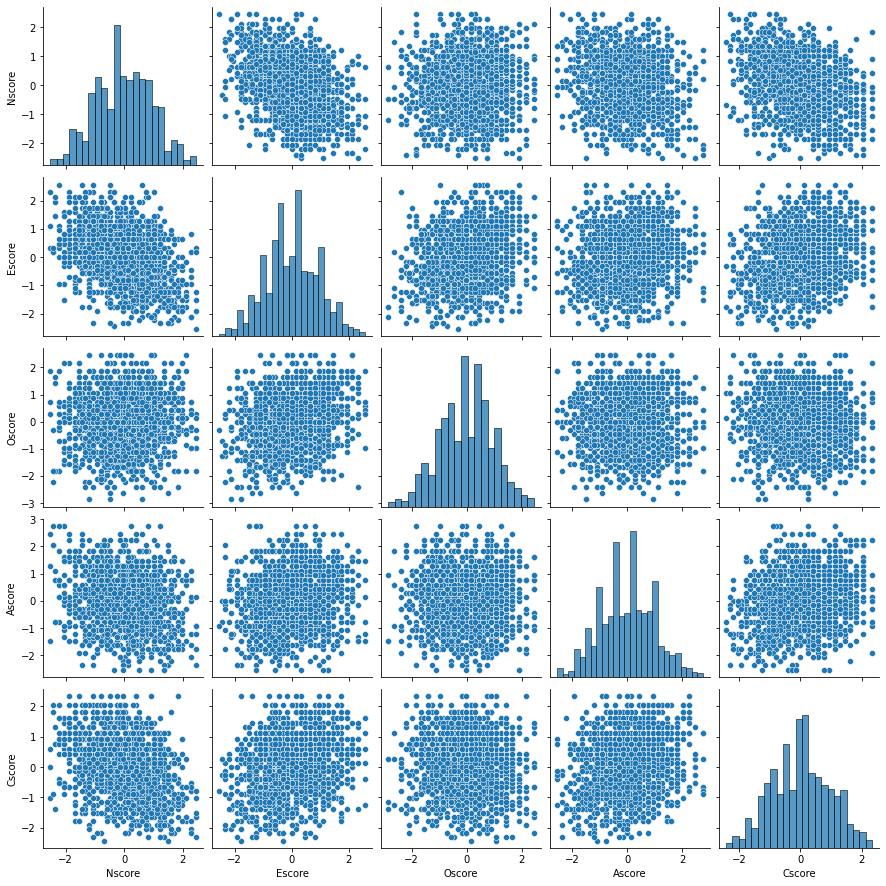

In [15]:
Q1 = dataset_copy.quantile(0.25)
Q3 = dataset_copy.quantile(0.75)

IQR = Q3 - Q1

dataset_copy_without_outliers = dataset_copy[~((dataset_copy < (Q1 - 1.5 * IQR)) |(dataset_copy > (Q3 + 1.5 * IQR))).any(axis=1)]
sns.pairplot(dataset_copy_without_outliers[["Nscore", "Escore", "Oscore", "Ascore", "Cscore"]])

In [16]:
dataset_copy.shape[0], dataset_copy_without_outliers.shape[0]

(1885, 1620)

As we saw, the dataset, once we removed the outliers, is really small, so we gonna try the same, but before that, we'll keep the predictors except the drugs as we'll drop them (we'll use as feature target).

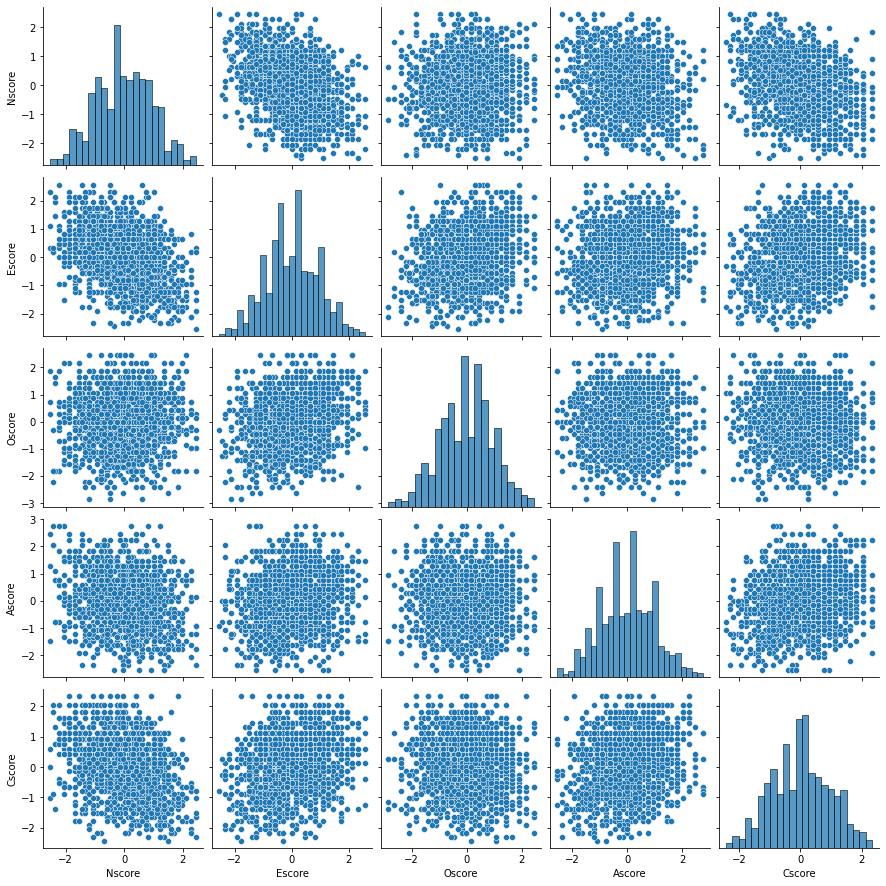

In [17]:
X_without_drugs = dataset.iloc[:, :12]

Q1 = X_without_drugs.quantile(0.25)
Q3 = X_without_drugs.quantile(0.75)

IQR = Q3 - Q1

dataset_without_outliers_drugs = X_without_drugs[~((X_without_drugs < (Q1 - 1.5 * IQR)) | (X_without_drugs > (Q3 + 1.5 * IQR))).any(axis=1)]
sns.pairplot(dataset_without_outliers_drugs[["Nscore", "Escore", "Oscore", "Ascore", "Cscore"]])

In [18]:
dataset_copy.shape[0], dataset_copy_without_outliers.shape[0], dataset_without_outliers_drugs.shape[0]

(1885, 1620, 1620)

Now, the dimension reduction is subtle. That is, because as we saw earlier, the most drugs have almost every label with **CL0** value so they are detected as outliers.

Soon we'll see that white ethnicity represents the 91.2% of the dataset ethnicities, so, if we remove the outliers it's possible that we'll remove also the other ethnicities. Let's gonna see:

In [19]:
# Original dataset
original_dataset_total_eth = len(np.unique(dataset_copy["Ethnicity"]))

# Dataset without outliers but preserving the drug predictors
dataset_without_drugs_total_eth = len(np.unique(dataset_copy_without_outliers["Ethnicity"]))

# Dataset without outliers but removing the drug predictors
dataset_with_drugs_total_eth = len(np.unique(dataset_without_outliers_drugs["Ethnicity"]))


original_dataset_total_eth, dataset_without_drugs_total_eth, dataset_with_drugs_total_eth

(7, 1, 1)

Did you see? if we remove the outliers in this case, we'll lose the posibility of generalize with other ethnicities or labels related to each drug (from **CL1** to **CL6**). 

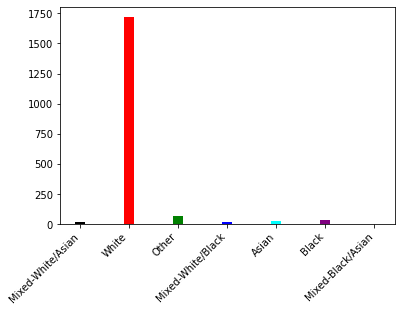

Counter({0.126: 20,
         -0.31685: 1720,
         0.1144: 63,
         -0.22166: 20,
         -0.50212: 26,
         -1.10702: 33,
         1.90725: 3})

In [20]:
from collections import Counter

eth_distribution = Counter(dataset_copy["Ethnicity"])

new_keys = ['Mixed-White/Asian','White','Other', 
            'Mixed-White/Black', 'Asian', 'Black',
            'Mixed-Black/Asian']

plt.bar(new_keys, eth_distribution.values(), 
        width=0.2, color=['black', 'red', 'green', 'blue', 'cyan', 'purple', 'yellow'])

plt.xticks(rotation=45, ha='right')
plt.show()
eth_distribution

In the last chart you can check how the most people are white, and might be interesting study how the minorities are related to the use of the drugs owing to the exclusion might be living.

The possible values per each drug is:

- CL0: Never used
- CL1: Used over a Decade Ago 
- CL2: Used in Last Decade
- CL3: Used in Last Year
- CL4: Used in Last Month
- CL5: Used in Last Week
- CL6: Used in Last Day

We could summarize it as:

- Long term.
    - CL0, CL1, CL2, CL3 >= 1 year.
    
- Short term.
    - CL4, CL5, CL6 <= 1 month.

Afterwards, we gonna make some searches using minorities with short term period, an we'll see if there're any relationship.

**NOTE**: White people have -0.31685 at Ethnicity variable.

In [21]:
other_eth = dataset_copy.query('Ethnicity != -0.31685')
white_eth = dataset_copy.query('Ethnicity == -0.31685')


def get_drugs_per_population(dataframe):
    drugs_per_population = np.zeros(len(drugs_name), dtype = np.int32)
    
    for index, row in enumerate(dataframe.iloc[:, 12:]):
        for value in dataframe[row]:
            if value == "CL4" or value == "CL5" \
            or value == "CL6":
                drugs_per_population[index] += 1
    return drugs_per_population


long_term_people_other = get_drugs_per_population(other_eth)
long_term_people_white = get_drugs_per_population(white_eth)

other_ratio = []
white_ratio = []
total = []

for i in range(len(long_term_people_other)):
    total = long_term_people_white[i] + long_term_people_other[i]
    print("\t\tDrug {}".format(drugs_name[i]))
    print("Total of people who consume at short term {}".format(total))
    print("Ratio other ethnicities/drug usage {:.4f}%".format((long_term_people_other[i]/other_eth.shape[0])*100.0))
    print("Ratio white ethnicity/drug usage {:.4f}%".format((long_term_people_white[i]/white_eth.shape[0])*100.0))
    print("\n")
    
    other_ratio.append((long_term_people_other[i]/other_eth.shape[0])*100.0)
    white_ratio.append((long_term_people_white[i]/white_eth.shape[0])*100.0)

		Drug Alcohol
Total of people who consume at short term 1551
Ratio other ethnicities/drug usage 75.7576%
Ratio white ethnicity/drug usage 82.9070%


		Drug Amphet
Total of people who consume at short term 238
Ratio other ethnicities/drug usage 16.3636%
Ratio white ethnicity/drug usage 12.2674%


		Drug Amyl
Total of people who consume at short term 41
Ratio other ethnicities/drug usage 3.6364%
Ratio white ethnicity/drug usage 2.0349%


		Drug Benzos
Total of people who consume at short term 299
Ratio other ethnicities/drug usage 16.9697%
Ratio white ethnicity/drug usage 15.7558%


		Drug Caff
Total of people who consume at short term 1764
Ratio other ethnicities/drug usage 87.8788%
Ratio white ethnicity/drug usage 94.1279%


		Drug Cannabis
Total of people who consume at short term 788
Ratio other ethnicities/drug usage 44.2424%
Ratio white ethnicity/drug usage 41.5698%


		Drug Choc
Total of people who consume at short term 1786
Ratio other ethnicities/drug usage 89.6970%
Ratio white

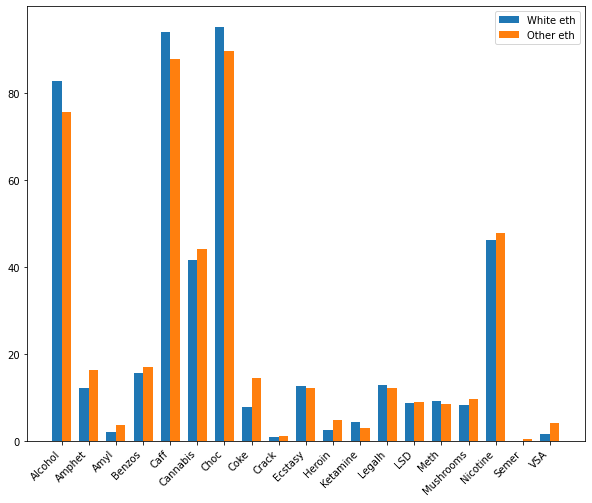

In [22]:
width = 0.35
x = np.arange(len(drugs_name))

plt.figure(figsize=(10, 8))
rects1 = plt.bar(x - width/2, white_ratio, width, label='White eth')
rects2 = plt.bar(x + width/2, other_ratio, width, label='Other eth')

plt.xticks(x, labels=drugs_name)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

As you can check, at short term, drugs have been taken by all ethnicities equally in almost every case with a tolerance of ± 3% according to the mean difference. So, if we remove other ethinicties values, we'll get a model which only is able to generalize well with white ethnicities people. One solution to this drawback might be increase the dataset size focusing on people of other ethnicities (e.g. using oversample method like SMOTE) , in this way, we'll have a dataset less imablanced than this one.

In addition we could check if there were correlations.

**NOTE**: Since drugs attributes are just strings, we gotta use **LabelEncoder** to transform them as integer because if we don't, the correlation matrix doesn't work properly.

In [23]:
from sklearn.preprocessing import LabelEncoder

def encode_attrs(current_dataset, low=12, high=30):
    for k, i in enumerate(current_dataset):
        if k >= low:
            current_dataset[i] = LabelEncoder().fit_transform(current_dataset[i])
    return current_dataset

other_encoded = encode_attrs(other_eth)
other_cmatrix = other_encoded.corr()

other_cmatrix["Ethnicity"].sort_values(ascending=False)

/home/pablo/ml/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Ethnicity    1.000000
Cannabis     0.443852
LSD          0.409057
Mushrooms    0.376606
Benzos       0.371504
SS           0.312370
Oscore       0.303996
Impulsive    0.269081
Nicotine     0.264457
Amphet       0.261594
Coke         0.256826
Legalh       0.254412
Ecstasy      0.253376
Caff         0.239089
VSA          0.236522
Meth         0.228675
Alcohol      0.189492
Nscore       0.171039
Amyl         0.161002
Heroin       0.128118
Ketamine     0.120543
Crack        0.114123
Choc         0.086410
Escore       0.039320
Semer        0.019606
Gender      -0.008753
Cscore      -0.128312
Ascore      -0.140647
Education   -0.158346
Age         -0.227350
Country     -0.394313
Name: Ethnicity, dtype: float64

In [24]:
to_encode_dataset = copy.deepcopy(dataset_copy)

dataset_copy_encoded = encode_attrs(to_encode_dataset)
original_cm_eth_array = dataset_copy_encoded.corr()
dataset_copy_cm_array = original_cm_eth_array["Ethnicity"].sort_values(ascending=False)

other_cm_eth_array = other_cmatrix["Ethnicity"].sort_values(ascending=False) 



original = (dataset_copy_cm_array[-1], dataset_copy_cm_array[1])

# dataset_copy_cm_array[1] 
# Since pos 0 is 1 because is the correlation with itlself.

other = (other_cm_eth_array[-1], other_cm_eth_array[1]) 

print("original : \t{}, \nother ethnicities : {}".format(original, other))

original : 	(-0.12794598791801579, 0.13604936048230304), 
other ethnicities : (-0.39431337424264723, 0.4438518148766022)


As we saw, the correlation differences according to Ethnicities are subtle.

In [25]:
dataset_copy_cm_array

Ethnicity    1.000000
Cannabis     0.136049
LSD          0.129031
Benzos       0.118517
Mushrooms    0.115962
SS           0.100304
VSA          0.087011
Coke         0.086853
Oscore       0.084816
Amphet       0.084407
Caff         0.084292
Impulsive    0.082411
Nicotine     0.077724
Legalh       0.077511
Ecstasy      0.071826
Meth         0.063805
Alcohol      0.053825
Nscore       0.047642
Heroin       0.042881
Amyl         0.038790
Crack        0.035478
Ketamine     0.031961
Choc         0.024475
Semer        0.022716
Escore       0.018402
Gender      -0.001213
Cscore      -0.029923
Education   -0.036099
Ascore      -0.038726
Age         -0.069753
Country     -0.127946
Name: Ethnicity, dtype: float64

Now, we gonna explore the label distribution per drug.

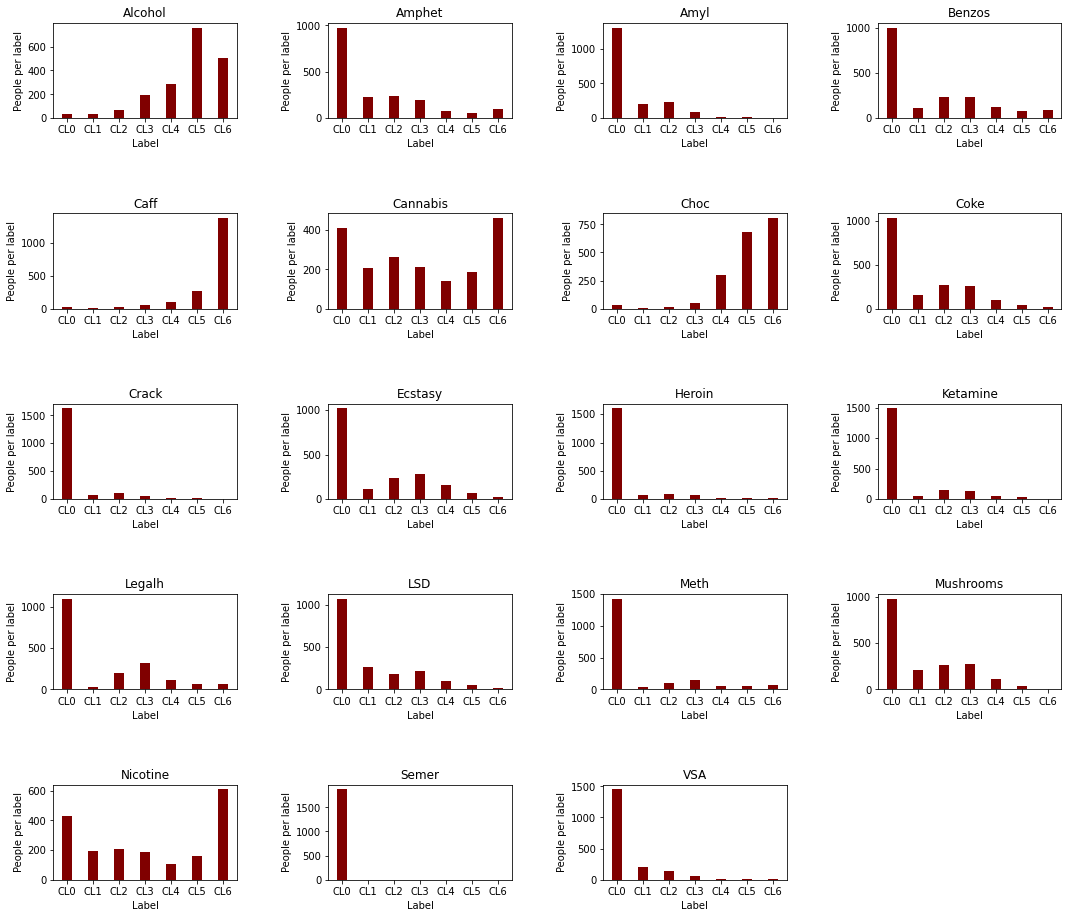

In [26]:
drugs_distribution = {}

for drug in drugs_name:
    total = {'CL0': 0, 'CL1': 0, 'CL2': 0, 'CL3': 0, 'CL4': 0, 'CL5': 0, 'CL6': 0}
    for label in dataset[drug]:
        total[label] += 1
    drugs_distribution[drug] = total
    
        
drug = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.1, right=1.5, bottom=0.01, top=1.2, hspace=1, wspace=0.5)
for i in range(0, len(drugs_name)):
    ax = fig.add_subplot(5, 4, i+1)
    values = list(drugs_distribution[drugs_name[i]].values())

    plt.bar(drug, values, color ='maroon', width = 0.4)
    plt.xlabel("Label")
    plt.ylabel("People per label")
    plt.title(drugs_name[i])
plt.show()

For **Alcohol**, **Nicotine**, **Cannabis**, **Choc** or **Caff**, the most are between **CL5** and **CL0**. Nevertheless in cases such as **LSD**, **VSA**, **Ketamine** and so on, the most are in **CL0**. Only **Cannabis** is close to a similar distribution among the labels. It turns out obivous that every label, which it isn't the most, is clearly underrepresented, so we'll have lots of problem regarding the generalization our model won't be able to do.

As we have few instances per almost every class, we might suppose, our classification algorithm won't generalize properly. Because of that, we should use other approach instead.

Let's gonna prove it.

We can use a Linear model as a benchmark. The first step is splitting the dataset between train and test. But first, we need to define which drug we gonna use as label. To prove what we said previously about the lack of representation per label, first, we gonna use Cannabis (since it's the most "balanced" feature) as response, and it's probably that due to the scarce data per label, our model don't generalize well.

In [27]:
y_cannabis = dataset_copy["Cannabis"]
X_cannabis = dataset_copy.drop(["Cannabis"], axis=1)

X_cannabis = encode_attrs(X_cannabis, 12)
y_cannabis = LabelEncoder().fit_transform(y_cannabis)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

params = {
    "C":np.arange(0.01, 1)
}

estimator_lr = LogisticRegression(solver="lbfgs", random_state=42)
grid_search = GridSearchCV(estimator=estimator_lr, param_grid=params, cv=5)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf_lr", grid_search)
])

pipeline.fit(X_cannabis, y_cannabis)

print(pipeline["clf_lr"].best_estimator_)
print(pipeline["clf_lr"].best_score_)

LogisticRegression(C=0.01, random_state=42)
0.45994694960212207


As expected, the linear model works like a random classifier. Nowadays, few datasets can be linearly separable. We could add Polynomial features to our dataset in order to make our model more flexible than the linear one.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

acc_test = []
models = []

for degree in range(2, 4):
    poly_features = PolynomialFeatures(degree=degree, include_bias = False)
    
    pipeline_lr = Pipeline([
        ("poly_features", poly_features),
        ("scaler", StandardScaler()),
        ("estimator", GridSearchCV(estimator=LogisticRegression(max_iter=1000,
                                         solver = "lbfgs",
                                         multi_class="multinomial"), 
                                   return_train_score = True,
                                   param_grid=params, cv=5))
    ])

    pipeline_lr.fit(X_cannabis, y_cannabis)
    
    acc_test.append(pipeline_lr["estimator"].best_score_)
    models.append(pipeline_lr["estimator"].best_estimator_)
    
    
print("Test accuracy :{}".format(acc_test))

Test accuracy :[0.44668435013262603, 0.42811671087533154]


In [30]:
pipeline_lr["estimator"].cv_results_

{'mean_fit_time': array([14.23535676]),
 'std_fit_time': array([2.62849813]),
 'mean_score_time': array([0.00605984]),
 'std_score_time': array([0.00085338]),
 'param_C': masked_array(data=[0.01],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}],
 'split0_test_score': array([0.37135279]),
 'split1_test_score': array([0.42440318]),
 'split2_test_score': array([0.4270557]),
 'split3_test_score': array([0.46153846]),
 'split4_test_score': array([0.45623342]),
 'mean_test_score': array([0.42811671]),
 'std_test_score': array([0.03207685]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.92970822]),
 'split1_train_score': array([0.92904509]),
 'split2_train_score': array([0.92440318]),
 'split3_train_score': array([0.91578249]),
 'split4_train_score': array([0.9270557]),
 'mean_train_score': array([0.92519894]),
 'std_train_score': array([0.00505721])}

The best test accuracy are between 0.44668 and 0.42812. However, the mean for the best estimator is 0.92519 and 0.00505 as std. So we have a clear overfitting problem. One way to solve this problem could be for example adding regularization terms.

Now, we could test a non parametric model such as KNN Classifier which is quite simple.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

params = {"n_neighbors": list(range(1, 101, 5)),
          "leaf_size": list(range(10, 60, 10))}

grid_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", GridSearchCV(KNeighborsClassifier(), params, cv=5, 
                              return_train_score = True))
])

grid_knn.fit(X_cannabis, y_cannabis)
grid_knn["estimator"].best_score_

0.44190981432360743

In [32]:
grid_knn["estimator"].best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=46)

Again, this classifier works like a random classifier. Furthermore, the number of neighbors is 46, which is a high number for the number of instances the model has. It's a clear mark of overfitting.

We gonna test some tree algorithms such as Decision Tree, Random Forest and finally Extra Trees which adds more randomness.

In [33]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 100)), 
          'min_samples_split': [2, 3, 4]}

estimator_decission_tree = DecisionTreeClassifier(random_state=42)
grid_search_cv_decissionTree = GridSearchCV(estimator_decission_tree, params, verbose=1, cv=5)

grid_search_cv_decissionTree.fit(X_cannabis, y_cannabis)
grid_search_cv_decissionTree.best_score_

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


0.43819628647214853

In [34]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': list(range(100, 500, 100)),
         'max_leaf_nodes': list(range(8, 22, 2))
         }

rf_estimator = RandomForestClassifier(random_state=42, warm_start=True,
                                  oob_score=True)

grid_search_rf = GridSearchCV(rf_estimator, params, verbose=1, cv=5)

grid_search_rf.fit(X_cannabis, y_cannabis)
grid_search_rf.best_score_, grid_search_rf.best_estimator_.oob_score_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


(0.4679045092838196, 0.4753315649867374)

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

params = {'n_estimators': list(range(50, 150))}

estimator_extratrees = ExtraTreesClassifier(n_estimators=100, random_state=42)

grid_search_extraTrees = GridSearchCV(estimator_extratrees, params, verbose=1, cv=5)

grid_search_extraTrees.fit(X_cannabis, y_cannabis)
grid_search_extraTrees.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


0.48541114058355433

Through ExtraTrees we got an increase near to 2% which isn't really significant.

Finally, we gonna test the dataset with SVM and if the accuracy doesn't improve, we'll use another approach.

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import reciprocal, uniform
from sklearn.svm import SVC

params = {
    "gamma": reciprocal(0.001, 0.1), 
    "C": uniform(0.1, 1)}

estimator = SVC()

rnd_search_svm = RandomizedSearchCV(estimator, params, 
                                   n_iter=30, cv=5)

pipeline_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", rnd_search_svm)
])

pipeline_svm.fit(X_cannabis, y_cannabis)
pipeline_svm["estimator"].best_score_

0.4822281167108754

As doesn't improve, we gonna test stratifying during the data splitting.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cannabis, y_cannabis, test_size=0.3, random_state=42, stratify=y_cannabis)


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline_svm.fit(X_train_scaled, y_train)
pipeline_svm["estimator"].best_score_

0.4844538541306602

What if we reduce the dimension of the dataset conserving so, the dimensions wich preserve the 95% of the training set variance? of course, it's very unlikely that the accuracy get increased since the point of this method is used for dimension reduction, but we could try. 

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

pca.n_components_, np.sum(pca.explained_variance_ratio_)

(22, 0.9572994529773114)

In [39]:
X_reduced_scaled = scaler.fit_transform(X_reduced)
pipeline_svm.fit(X_reduced_scaled, y_train)
pipeline_svm["estimator"].best_score_

0.47383915197603416

As we saw any model for the proposed approach doesn't work properly. We gonna test few models with other drug like Heroin:

In [40]:
y_heroin = dataset_copy["Heroin"]
X_heroin = dataset_copy.drop(["Heroin"], axis=1)

X_heroin = encode_attrs(X_heroin, 12)
y_heroin = LabelEncoder().fit_transform(y_heroin)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_heroin, y_heroin, 
                                                    test_size=0.3, 
                                                    random_state=42)
params = {
    "C":np.arange(0.0001, 0.1)
}

estimator_lr = LogisticRegression(solver="lbfgs", random_state=42)
grid_search = GridSearchCV(estimator=estimator_lr, param_grid=params, cv=5)

pipeline_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf_lr", grid_search)
])

pipeline_lr.fit(X_train, y_train)

print(pipeline_lr["clf_lr"].best_estimator_)
print(pipeline_lr["clf_lr"].best_score_)

LogisticRegression(C=0.0001, random_state=42)
0.8521603871413758


Now we got a better result about 85.22%! That's great, although we don't know if it's really a nice result since we need to check each prediction in order to make sure whether the model generalizes well with each label or just generalizes with the label which has the most instances.

In [42]:
from sklearn.metrics import confusion_matrix

def plot_cmatrix(y_test, y_pred, classes = ["CL0", "CL1", "CL2",
                                                 "CL3", "CL4", "CL5",
                                                 "CL6"
                                                ]):
    
    cm_matrix = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm_matrix, index = [i for i in classes],
                  columns = [i for i in classes])

    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt='g')

0.8498233215547704

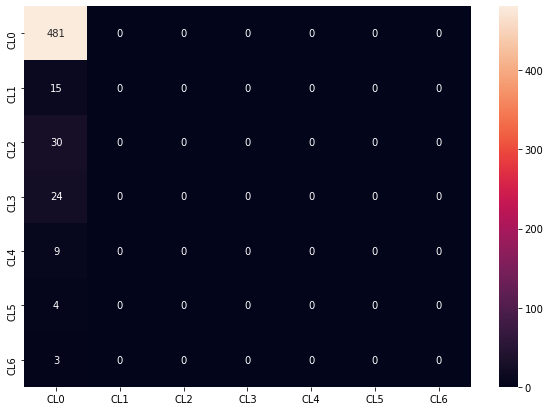

In [43]:
y_pred = pipeline_lr["clf_lr"].predict(X_test)

plot_cmatrix(y_test, y_pred)

sum(y_pred==y_test)/len(y_pred)

Looks like our model isn't able to generalize since only detects label CL0 as TP (True Positive) and the remaining as CL0 FN (False Negative).

We gonna reduce the dataset dimension to 2, since, in this way, we could visualize the dataset as clusters which each one corresponds to a label in 2D scatter chart.

The algorithm we gonna use is t-Distributed Stochastic Neighbor Embedding (TSNE) since the point of this algorithm is just trying to keep similar instances as close as possible and the diferent ones as far as possible.

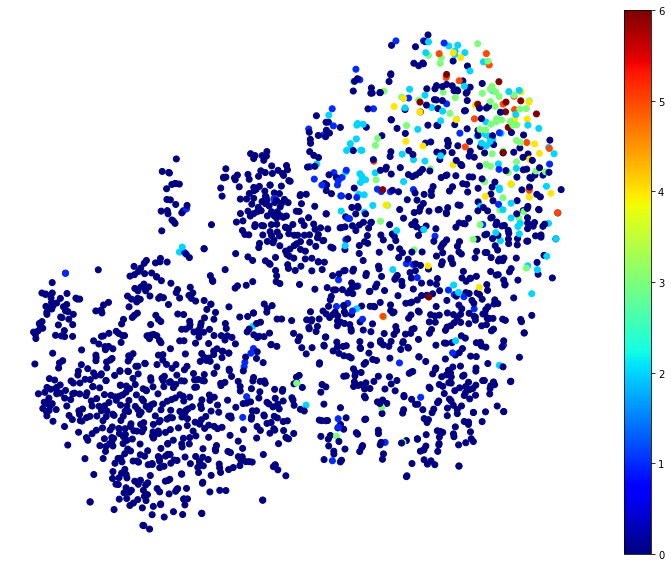

In [44]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_heroin)

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_heroin, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

According to the results we had previously, the most distinguible feature is **CL0** (dark blue), the remaining features are a few and overlapped with one another. This chart explain perfectly what's happening during the predictions our model did.

As we saw, the more instances in one class are, the higher accuracy our model will has. That is, because this dataset it's really imbalanced and also has few instances, so, when one class has a lot of instances, our model automatically detects that all instances belongs to this class. Due to that, our model cannot generalize well.

We'll use the SVM classifier instead the logistic regression.

0.8498233215547704

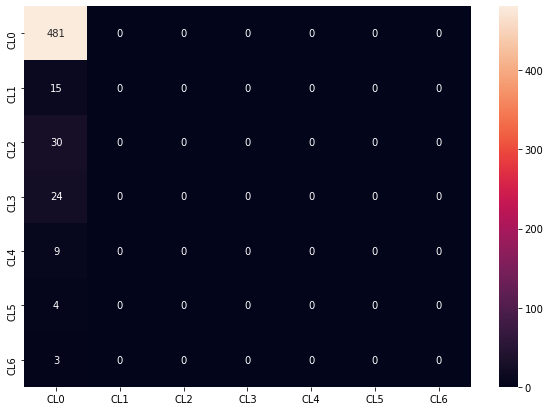

In [45]:
params = {
    "gamma": reciprocal(0.001, 0.1), 
    "C": uniform(0.1, 1),
    "kernel": ['rbf', 'poly']
}

estimator = SVC()

rnd_search_svm = RandomizedSearchCV(estimator, params, 
                                   n_iter=30, cv=5)

pipeline_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", rnd_search_svm)
])

pipeline_svm.fit(X_train, y_train)
pipeline_svm["estimator"].best_score_

y_pred = pipeline_svm["estimator"].predict(X_test)

plot_cmatrix(y_test, y_pred)

sum(y_pred==y_test)/len(y_pred)

Again, the model only "works" for CL0 label.

We gonna test the last approach. This approach make a distinction between two labels. On the one hand **CL0** label which represent people who aren't take drugs, and, on the other hand, the people who do (or who did) which are composed of the labels from **CL1** to **CL6**. We have used only two labels instead of seven, because there are extremely few instances per each label since the most are located between **CL0** and **CL6**.

As we did previosly, we gonna use as target, the **Cannabis** drug.

In [46]:
copy_reduction = copy.deepcopy(dataset_copy)

for row in copy_reduction.iloc[:, 12:]:
    for index, value in enumerate(copy_reduction[row]):
        
        if value == 'CL0':
            copy_reduction.loc[index, row] = 1
            
        else:
            copy_reduction.loc[index, row] = 0



y_aux = copy_reduction["Cannabis"]
X_aux = copy_reduction.drop(["Cannabis"], axis=1)

y_aux = LabelEncoder().fit_transform(y_aux)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_aux, y_aux, 
                                                    test_size=0.3, 
                                                    random_state=42)

params = {
    "gamma": reciprocal(0.001, 0.1), 
    "C": uniform(0.1, 1),
    "kernel": ['rbf', 'poly']
}

estimator = SVC()

rnd_search_svm = RandomizedSearchCV(estimator, params, 
                                   n_iter=30, cv=5)

pipeline_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", rnd_search_svm)
])

pipeline_svm.fit(X_train, y_train)

pipeline_svm["estimator"].best_estimator_

SVC(C=0.598534972017949, gamma=0.0016393817793122097)

0.9028268551236749

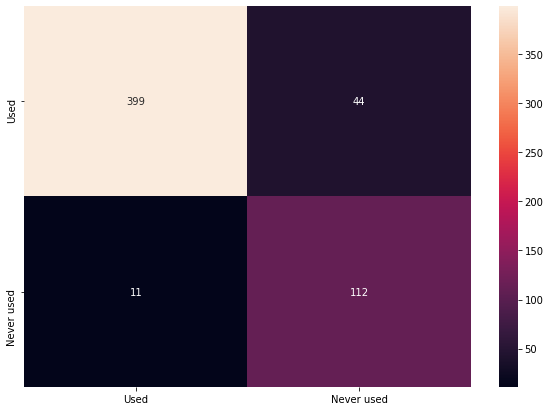

In [48]:
pipeline_svm["estimator"].best_score_

y_pred = pipeline_svm["estimator"].predict(X_test)

plot_cmatrix(y_test, y_pred, classes=["Used", "Never used"])

sum(y_pred==y_test)/len(y_pred)

That's a nice result since the model generalize better that the above.

Now, we've:
- TP: 396 instaces.
- FN: 11 instaces.
- FP: 47 instaces.
- TN: 112 instaces.

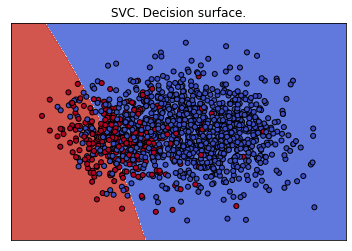

In [49]:
def plot_decision_boundary(X, y):
    pca = PCA(n_components=2)
    X_train_reduced = pca.fit_transform(X)
    pipeline_svm.fit(X_train_reduced, y)

    title = 'SVC. Decision surface.'

    A, B = X_train_reduced[:, 0], X_train_reduced[:, 1]

    y_min, y_max = B.min() - 1, B.max() + 1
    x_min, x_max = A.min() - 1, A.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))


    fig, ax = plt.subplots()
    Z = pipeline_svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.9)
    ax.scatter(A, B, c=y, cmap=plt.cm.coolwarm, s=25, edgecolors='k')
    ax.set_yticks(())
    ax.set_xticks(())
    ax.set_title(title)
    plt.show()

plot_decision_boundary(X_train, y_train)

And finally, we may test an ensemble classifier composed by 4 Classifiers, such as **MLP**, **SVC**, **RandomForest** and **ExtraTreesClassifier**.

In [50]:
from sklearn.neural_network import MLPClassifier

random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(probability = True, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
]

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(named_estimators, voting='soft')
voting_clf.fit(X_train, y_train)

[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

/home/pablo/ml/my_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.8816254416961131,
 0.8957597173144877,
 0.8851590106007067,
 0.8869257950530035]

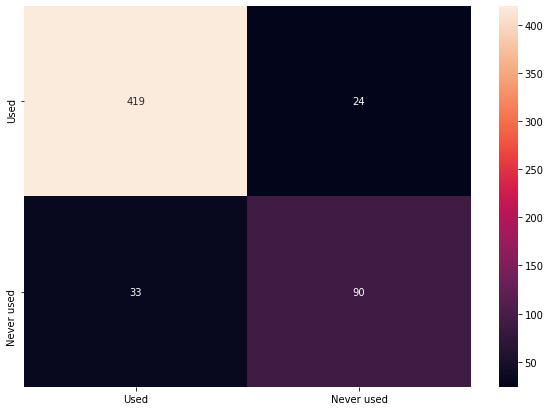

In [51]:
y_pred = voting_clf.predict(X_test)

plot_cmatrix(y_test, y_pred, classes=["Used", "Never used"])

Through the ensemble method, we got better results for Used label than  we got through SVM. However, in the case of Never Used we had fewer instances classified correctly. Besides, we had less false positives but more false negatives. Additionaly we got a recall of 92.7%.

As bonus approach we'll use the **imbalanced** library which implements a bunch of methods to deal with imbalanced data. The one we gonna use is Synthetic Minority Oversampling Technique (<a href ="https://arxiv.org/abs/1106.1813">SMOTE</a>).

In [52]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold

steps = [('oversampling', SMOTE()), ('scaler', StandardScaler()), ('model', SVC())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_aux, y_aux, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean: %.3f' % np.mean(scores))

Mean: 0.931


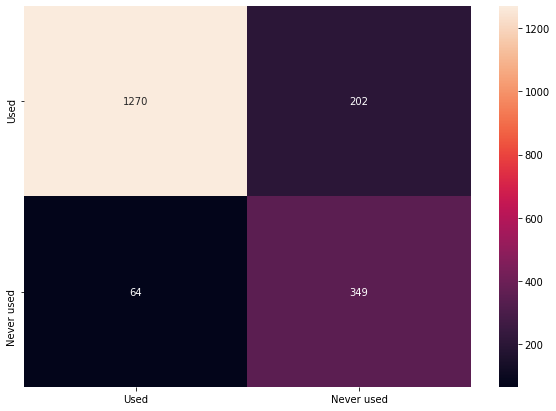

In [53]:
y_pred = cross_val_predict(pipeline, X_aux, y_aux, cv=3)

plot_cmatrix(y_aux, y_pred, classes=["Used", "Never used"])

Through **SMOTE** we got a better results than with the other methods. We got at 93% of accuracy! In addition, we got a recall of 95.12%.

If we use the manifold method **TSNE** to reduce the dimensions of the dataset and plot it, the result is:

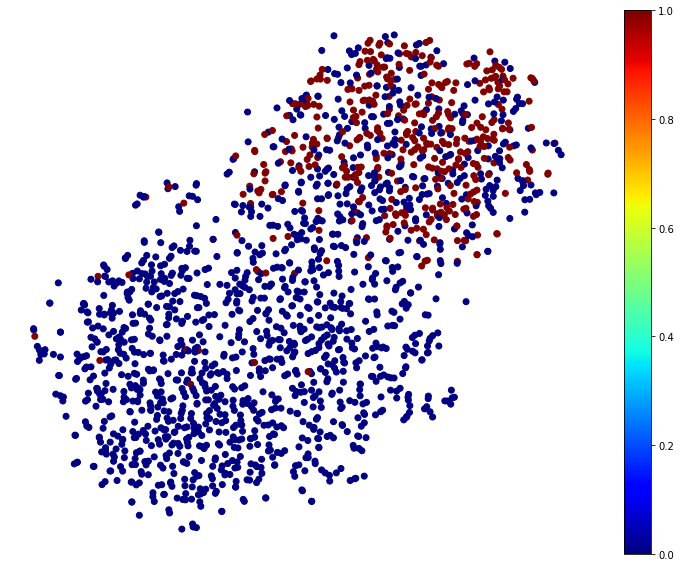

In [54]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_aux)

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_aux, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

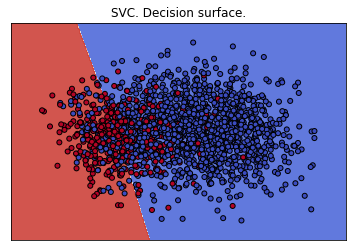

In [55]:
plot_decision_boundary(X_aux, y_aux)